In [1]:
%load_ext autoreload
%autoreload 2

from dlp.dataset import Dataset
from utils import PostProcessor

In [2]:
# Load dataset
ds = Dataset()
ds.load('data/DJI_0012')

processor = PostProcessor(ds)

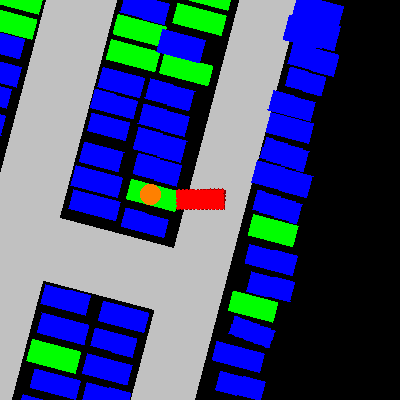

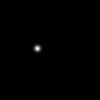

(<PIL.Image.Image image mode=RGB size=400x400 at 0x7F017E2C6970>,
 <PIL.Image.Image image mode=L size=100x100 at 0x7F017E2C66D0>)

In [3]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=50)[-1]

img_frame = processor.vis.plot_frame(frame['frame_token'])

processor.gen_feature_label(frame['instances'][0], img_frame, display=True)

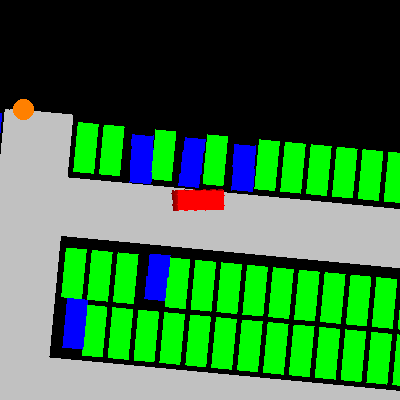

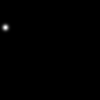

(<PIL.Image.Image image mode=RGB size=400x400 at 0x7F017E336E50>,
 <PIL.Image.Image image mode=L size=100x100 at 0x7F017E2E07F0>)

In [4]:
processor.gen_feature_label(frame['instances'][5], img_frame, display=True)